### Cтоимость автомобиля
Нужно построить модель, которая поможет быстро узнать рыночную стоимость автомобиля. 

In [582]:
import pandas as pd

In [583]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# 1. Подготовка данных

In [584]:
df = pd.read_csv('/datasets/autos.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB
None


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [585]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245814 entries, 3 to 354367
Data columns (total 16 columns):
DateCrawled          245814 non-null object
Price                245814 non-null int64
VehicleType          245814 non-null object
RegistrationYear     245814 non-null int64
Gearbox              245814 non-null object
Power                245814 non-null int64
Model                245814 non-null object
Kilometer            245814 non-null int64
RegistrationMonth    245814 non-null int64
FuelType             245814 non-null object
Brand                245814 non-null object
NotRepaired          245814 non-null object
DateCreated          245814 non-null object
NumberOfPictures     245814 non-null int64
PostalCode           245814 non-null int64
LastSeen             245814 non-null object
dtypes: int64(7), object(9)
memory usage: 31.9+ MB
None


Было удалено меньше трети выборки. Датасет и после этого все равно огромен, врядли будут утрачены какие-то важные закономерности, скорость обучения будет выше.

In [586]:
df = df.reset_index(drop = True)

In [587]:
df.duplicated().sum()

4

In [588]:
df = df.drop_duplicates().reset_index(drop = True)

Удаляем бесполезные столбцы

In [589]:
df1 = df.drop(['DateCrawled', 'DateCreated', 'PostalCode', 'LastSeen', 'NumberOfPictures'], axis=1)
df1.head(5)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
1,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
2,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
3,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no
4,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no


In [590]:
df1['NotRepaired'] = df1['NotRepaired'].replace('yes', 'True')
df1['NotRepaired'] = df1['NotRepaired'].replace('no', 'False')
df1['NotRepaired'] = df1['NotRepaired'].astype('bool')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245810 entries, 0 to 245809
Data columns (total 11 columns):
Price                245810 non-null int64
VehicleType          245810 non-null object
RegistrationYear     245810 non-null int64
Gearbox              245810 non-null object
Power                245810 non-null int64
Model                245810 non-null object
Kilometer            245810 non-null int64
RegistrationMonth    245810 non-null int64
FuelType             245810 non-null object
Brand                245810 non-null object
NotRepaired          245810 non-null bool
dtypes: bool(1), int64(5), object(5)
memory usage: 19.0+ MB
None


Были удалены строки, которые в основном не содержали важного признака NotRepaired, который в свою очередь должен сильно влиять на цену (целевой признак). Т.е. отсутствие информации на этот счёт негативно повлияет на обучение модели. Ниже приведены графики до и после удаления строк с Nan, также "срезаны" артефакты.

20000


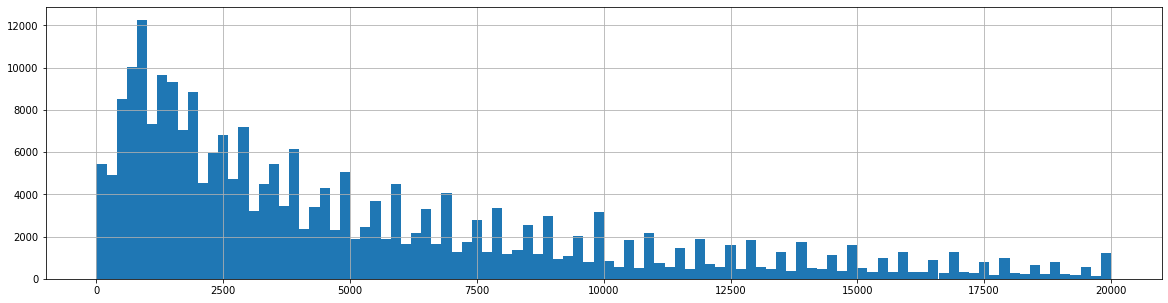

In [591]:
print(df['Price'].max())
df['Price'].hist(bins=100, figsize=(20,5))

In [592]:
df1 = df1.query('0 < Price')

20000


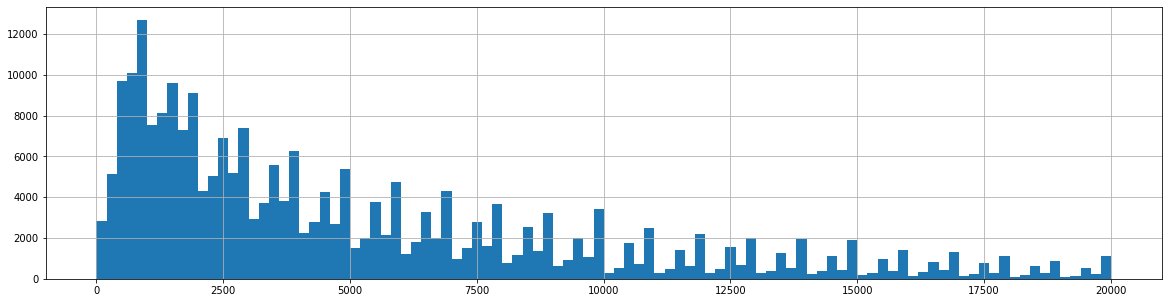

In [593]:
print(df1['Price'].max())
df1['Price'].hist(bins=100, figsize=(20,5))

2018


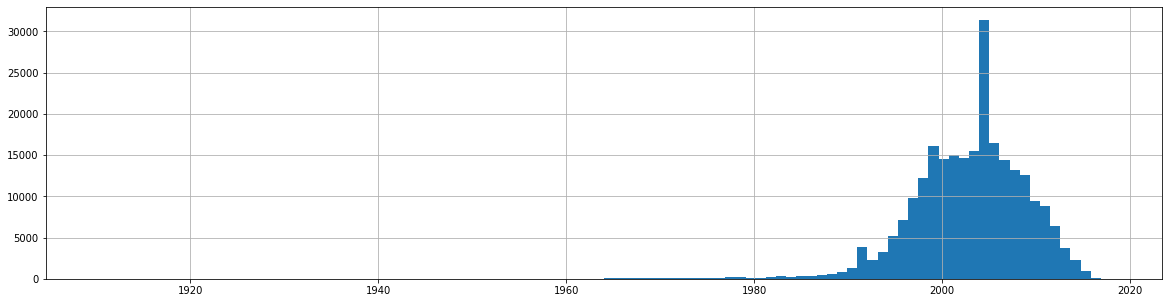

In [594]:
print(df['RegistrationYear'].max())
df['RegistrationYear'].hist(bins=100, figsize=(20,5))

In [595]:
df1 = df1.query('1960 < RegistrationYear')

2018


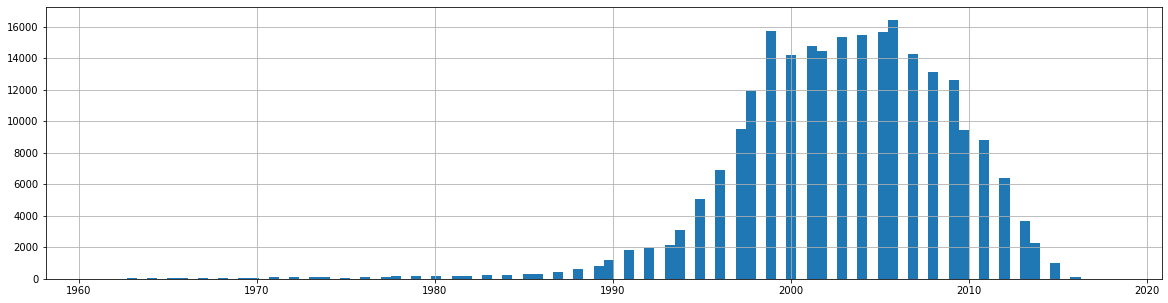

In [596]:
print(df1['RegistrationYear'].max())
df1['RegistrationYear'].hist(bins=100, figsize=(20,5))

20000


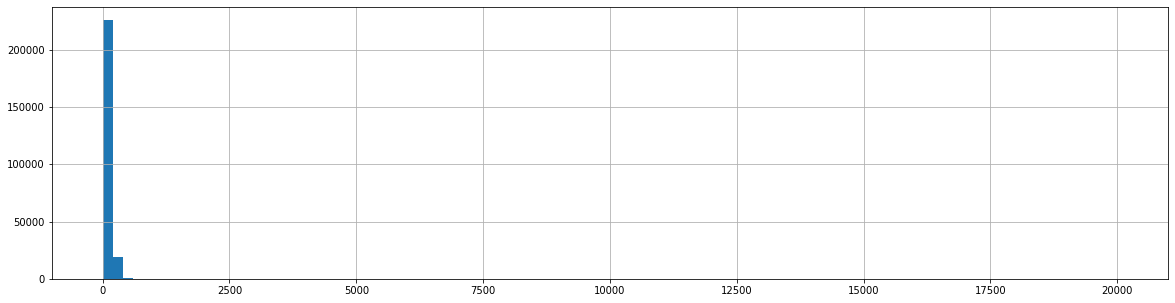

In [597]:
print(df['Power'].max())
df['Power'].hist(bins=100, figsize=(20,5))

In [598]:
df1 = df1.query('600 > Power > 0')

585


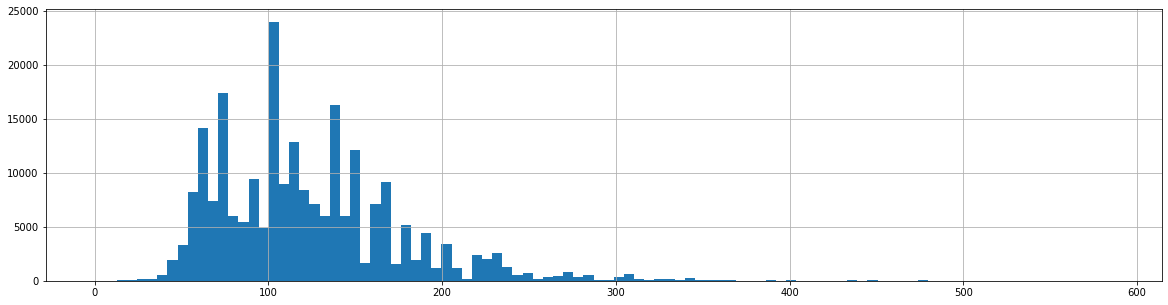

In [599]:
print(df1['Power'].max())
df1['Power'].hist(bins=100, figsize=(20,5))

150000


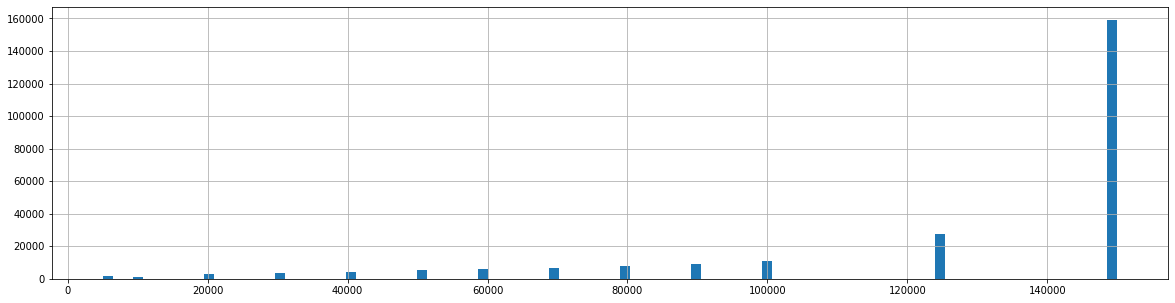

In [600]:
print(df['Kilometer'].max())
df['Kilometer'].hist(bins=100, figsize=(20,5))

150000


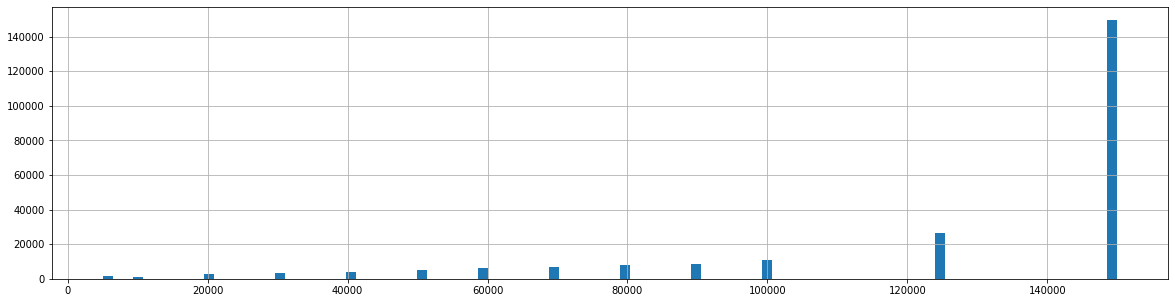

In [601]:
print(df1['Kilometer'].max())
df1['Kilometer'].hist(bins=100, figsize=(20,5))

12


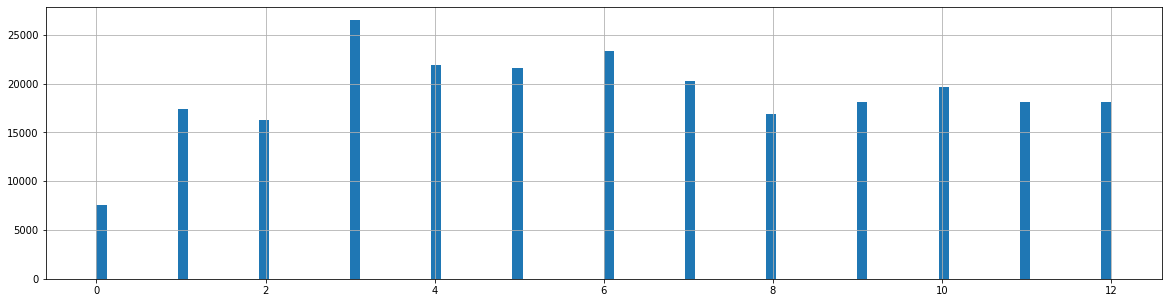

In [602]:
print(df['RegistrationMonth'].max())
df['RegistrationMonth'].hist(bins=100, figsize=(20,5))

In [603]:
df1 = df1.query('RegistrationMonth > 0')

12


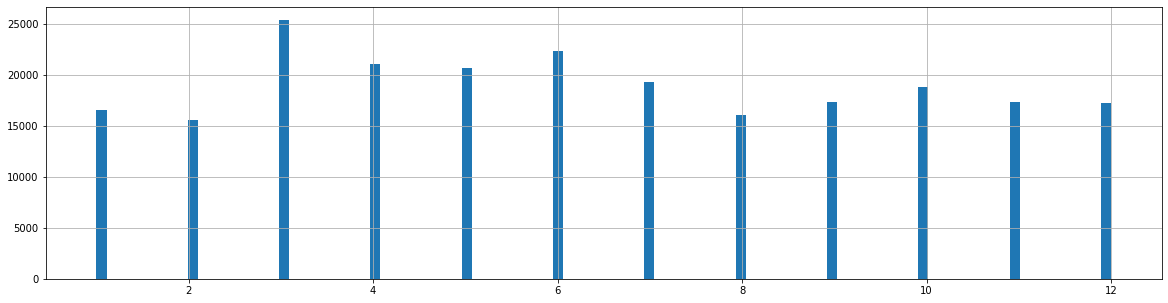

In [604]:
print(df1['RegistrationMonth'].max())
df1['RegistrationMonth'].hist(bins=100, figsize=(20,5))

### object

In [605]:
print(df1['VehicleType'].value_counts())

sedan          67355
small          53291
wagon          47618
bus            22186
convertible    15359
coupe          11214
suv             9064
other           1368
Name: VehicleType, dtype: int64


In [606]:
print(df1['Gearbox'].value_counts())

manual    179661
auto       47794
Name: Gearbox, dtype: int64


In [607]:
print(df1['Model'].value_counts())

golf                  18871
other                 16740
3er                   13841
polo                   7976
corsa                  7400
                      ...  
serie_3                   3
serie_2                   3
range_rover_evoque        2
samara                    2
rangerover                1
Name: Model, Length: 249, dtype: int64


In [608]:
print(df1['FuelType'].value_counts())

petrol      148792
gasoline     74399
lpg           3580
cng            423
hybrid         167
other           48
electric        46
Name: FuelType, dtype: int64


In [609]:
print(df1['Brand'].value_counts())

volkswagen       48118
bmw              25614
opel             23697
mercedes_benz    22248
audi             20339
ford             15549
renault          10328
peugeot           7257
fiat              5750
seat              4602
skoda             4221
mazda             3669
toyota            3417
citroen           3394
nissan            3189
smart             3145
mini              2621
hyundai           2582
volvo             2311
mitsubishi        1857
honda             1781
kia               1739
suzuki            1564
alfa_romeo        1549
chevrolet         1152
chrysler           915
dacia              686
porsche            522
subaru             488
daihatsu           462
jeep               459
saab               392
land_rover         391
jaguar             367
daewoo             296
lancia             283
rover              236
trabant            142
lada               123
Name: Brand, dtype: int64


# 2. Обучение моделей

### CatBoostRegressor

In [610]:
df_learn, df_test = train_test_split(df1, test_size=0.10, random_state=12345)

df_train, df_valid = train_test_split(df_learn, test_size=0.20, random_state=12345)


features_train = df_train.drop(['Price'], axis=1)
target_train = df_train['Price']

features_valid = df_valid.drop(['Price'], axis=1)
target_valid = df_valid['Price']

features_test = df_test.drop(['Price'], axis=1)
target_test = df_test['Price']

print('train')
print(features_train.shape)
print(target_train.shape)
print()
print('valid')
print(features_valid.shape)
print(target_valid.shape)
print()
print('test')
print(features_test.shape)
print(target_test.shape)

train
(163767, 10)
(163767,)

valid
(40942, 10)
(40942,)

test
(22746, 10)
(22746,)


In [611]:
from catboost import CatBoostRegressor

catfeatures = ['VehicleType', 'Gearbox', 'Model',
                'FuelType', 'Brand', 'NotRepaired']

for n in range(1,12,2):

    modelCatBoost = CatBoostRegressor(loss_function="RMSE", iterations=30, learning_rate = 1,
                                  max_depth=n)
    modelCatBoost = modelCatBoost.fit(features_train, target_train, cat_features=catfeatures)
    
    train_modelCatBoost_predictions = modelCatBoost.predict(features_train)   
    valid_modelCatBoost_predictions = modelCatBoost.predict(features_valid)    
    test_modelCatBoost_predictions = modelCatBoost.predict(features_test)
    print('max_depth :', n)
    print("RMSE train:", (mean_squared_error(target_train, train_modelCatBoost_predictions))** 0.5)
    print("RMSE valid:", (mean_squared_error(target_valid, valid_modelCatBoost_predictions))** 0.5)
    print("RMSE test:", (mean_squared_error(target_test, test_modelCatBoost_predictions))** 0.5)

0:	learn: 3646.7124722	total: 14.6ms	remaining: 422ms
1:	learn: 3238.1861664	total: 24.9ms	remaining: 349ms
2:	learn: 3075.5600125	total: 123ms	remaining: 1.1s
3:	learn: 2988.2816856	total: 312ms	remaining: 2.03s
4:	learn: 2906.9986335	total: 323ms	remaining: 1.61s
5:	learn: 2833.4277196	total: 418ms	remaining: 1.67s
6:	learn: 2774.1292150	total: 517ms	remaining: 1.7s
7:	learn: 2706.6096474	total: 620ms	remaining: 1.7s
8:	learn: 2680.1529903	total: 717ms	remaining: 1.67s
9:	learn: 2651.9843957	total: 815ms	remaining: 1.63s
10:	learn: 2604.5972660	total: 910ms	remaining: 1.57s
11:	learn: 2580.7159847	total: 1.01s	remaining: 1.52s
12:	learn: 2557.7016842	total: 1.11s	remaining: 1.45s
13:	learn: 2521.4603889	total: 1.21s	remaining: 1.38s
14:	learn: 2499.6672568	total: 1.31s	remaining: 1.31s
15:	learn: 2483.2493894	total: 1.4s	remaining: 1.23s
16:	learn: 2453.2744611	total: 1.41s	remaining: 1.08s
17:	learn: 2438.9816364	total: 1.51s	remaining: 1.01s
18:	learn: 2425.9805409	total: 1.6s	rema

In [612]:
%%time

modelCatBoost = CatBoostRegressor(loss_function="RMSE", iterations=30, learning_rate = 1,
                                  max_depth=11, verbose = False)
modelCatBoost = modelCatBoost.fit(features_train, target_train, cat_features=catfeatures)
train_modelCatBoost_predictions = modelCatBoost.predict(features_train)   
valid_modelCatBoost_predictions = modelCatBoost.predict(features_valid)
test_modelCatBoost_predictions = modelCatBoost.predict(features_test)
print('max_depth :', n)
print("RMSE train:", (mean_squared_error(target_train, train_modelCatBoost_predictions))** 0.5)
print("RMSE valid:", (mean_squared_error(target_valid, valid_modelCatBoost_predictions))** 0.5)
print("RMSE test:", (mean_squared_error(target_test, test_modelCatBoost_predictions))** 0.5)

max_depth : 11
RMSE train: 1541.5282217499184
RMSE valid: 1703.6874622623423
RMSE test: 1736.664519933521
CPU times: user 13.8 s, sys: 1.69 s, total: 15.5 s
Wall time: 18.4 s


### LGBMRegressor

Чтоб получилось равное количество столбцов у выборок удаляем редко повторяющиеся строчки 

In [613]:
print(df1['Model'].value_counts().tail(20))

terios                25
b_max                 24
delta                 23
9000                  19
musa                  17
charade               13
materia               12
200                   11
q3                    11
amarok                11
gl                    10
kappa                 10
kalina                 5
elefantino             4
i3                     4
serie_3                3
serie_2                3
range_rover_evoque     2
samara                 2
rangerover             1
Name: Model, dtype: int64


In [614]:
stolbci = df1['Model'].value_counts().tail(20).reset_index(drop=False)['index'].tolist()

In [615]:
df1 = df1.query('Model != @stolbci')

In [616]:
print(df1['Model'].value_counts().tail(20))

kalos                67
g_klasse             67
discovery            65
r19                  64
range_rover          59
cx_reihe             54
glk                  53
crossfire            52
defender             51
90                   50
range_rover_sport    49
lanos                41
nubira               40
911                  39
v60                  38
croma                32
lybra                32
lodgy                29
145                  26
move                 25
Name: Model, dtype: int64


### pd.get_dummies

In [617]:
cols =  ['VehicleType','Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

df1 = pd.get_dummies(df1, columns=cols, drop_first=True)
print(df1.shape)

(227245, 285)


In [618]:
df_learn, df_test = train_test_split(df1, test_size=0.10, random_state=12345)

df_train, df_valid = train_test_split(df_learn, test_size=0.20, random_state=12345)


features_train = df_train.drop(['Price'], axis=1)
target_train = df_train['Price']

features_valid = df_valid.drop(['Price'], axis=1)
target_valid = df_valid['Price']

features_test = df_test.drop(['Price'], axis=1)
target_test = df_test['Price']

print('train')
print(features_train.shape)
print(target_train.shape)
print()
print('valid')
print(features_valid.shape)
print(target_valid.shape)
print()
print('test')
print(features_test.shape)
print(target_test.shape)

train
(163616, 284)
(163616,)

valid
(40904, 284)
(40904,)

test
(22725, 284)
(22725,)


In [619]:
import lightgbm as lgb


In [620]:

for n in range(10,150,10):

    modelgbm = lgb.LGBMRegressor(silent = False, loss_function="RMSE", iterations=10, n_estimators=n,
                             learning_rate=1)
    modelgbm.fit(features_train, target_train, eval_metric='RMSE')

    print('n_estimators=', n)
    pred_train = modelgbm.predict(features_train)
    mse = mean_squared_error(target_train, pred_train)
    rmse = mse ** 0.5
    print("RMSE train:", rmse)

    pred_valid = modelgbm.predict(features_valid)
    mse = mean_squared_error(target_valid, pred_valid)
    rmse = mse ** 0.5
    print("RMSE valid:", rmse)

    pred_test = modelgbm.predict(features_test)
    mse = mean_squared_error(target_test, pred_test)
    rmse = mse ** 0.5
    print("RMSE  test:", rmse)

n_estimators= 10
RMSE train: 1816.8528322773036
RMSE valid: 1834.8902032187002
RMSE  test: 1844.1085982935779
n_estimators= 20
RMSE train: 1721.4038446961501
RMSE valid: 1771.8685811406815
RMSE  test: 1782.7889142550268
n_estimators= 30
RMSE train: 1666.0598910725596
RMSE valid: 1731.4395481074037
RMSE  test: 1742.6662410802178
n_estimators= 40
RMSE train: 1626.7078389152439
RMSE valid: 1705.915710938817
RMSE  test: 1725.0311957533893
n_estimators= 50
RMSE train: 1593.9634073724435
RMSE valid: 1697.9712822260628
RMSE  test: 1716.3311925504286
n_estimators= 60
RMSE train: 1573.314826228909
RMSE valid: 1693.7449572348858
RMSE  test: 1713.361084079051
n_estimators= 70
RMSE train: 1552.7762970114304
RMSE valid: 1690.6825561651565
RMSE  test: 1707.1123589865206
n_estimators= 80
RMSE train: 1535.2575617725697
RMSE valid: 1689.747592650922
RMSE  test: 1704.553671096756
n_estimators= 90
RMSE train: 1517.511613590869
RMSE valid: 1687.1557462650621
RMSE  test: 1704.582025729481
n_estimators= 100

In [622]:
%%time
modelgbm = lgb.LGBMRegressor(silent = False, loss_function="RMSE", iterations=10, n_estimators=150,
                             learning_rate=1)
modelgbm.fit(features_train, target_train, eval_metric='RMSE')

pred_train = modelgbm.predict(features_train)
mse = mean_squared_error(target_train, pred_train)
rmse = mse ** 0.5
print("RMSE train:", rmse)

pred_valid = modelgbm.predict(features_valid)
mse = mean_squared_error(target_valid, pred_valid)
rmse = mse ** 0.5
print("RMSE valid:", rmse)
pred_test = modelgbm.predict(features_test)
mse = mean_squared_error(target_test, pred_test)
rmse = mse ** 0.5
print("RMSE test:", rmse)

RMSE train: 1443.5392212254478
RMSE valid: 1683.874281603735
RMSE test: 1699.0093751056963
CPU times: user 13.9 s, sys: 509 ms, total: 14.4 s
Wall time: 14.5 s


# 3. Анализ моделей

##### LGBMRegressor по всей видимости работает быстрее и качество показывает выше.

### CatBoostRegressor
* iterations=30
* learning_rate = 1
* max_depth : 11
* RMSE test: 1736.664519933521
* CPU times: user 12.9 s, sys: 1.43 s, total: 14.3 s
* Wall time: 17.6 s

### LGBMRegressor
* iterations=10
* n_estimators=150
* learning_rate=1
* RMSE test: 1699.0093751056963
* CPU times: user 7.95 s, sys: 261 ms, total: 8.21 s
* Wall time: 8.39 s